# Testin all the functions from the scripts before adding them to main python file.

In [1]:
# used to for Jupyter / IPython: After editing a module, changes are not effective without kernel restart
# Source links:
# https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart
# https://stackoverflow.com/questions/1254370/reimport-a-module-while-interactive
%load_ext autoreload
%autoreload 2

In [2]:
# Check local directory is 'sma_project_repo'
!pwd

/home/pkn/workspace/side_projects/sma_project_repo


In [3]:
#workflow settings
FETCH_REPO = False
TRANSFORM_DATA = False
TRAIN_MODEL = False

# # when running for the first time
# FETCH_REPO = True
# TRANSFORM_DATA = True
# TRAIN_MODEL = True

# 1) Fetching data from API / Loading from a local storage

In [4]:
from scripts.data_repo import DataRepository

In [5]:
repo = DataRepository()

In [6]:
?repo.fetch_tickers

Signature: repo.fetch_tickers(start_date=None, end_date=None)
Docstring: Fetch Tickers data from the Yfinance API
File:      ~/workspace/side_projects/sma_project_repo/scripts/data_repo.py
Type:      method

In [7]:
if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')  

  
# DEBUG: Separate fetching of the datasets (YFinance-Tickers, YFinance-Indexes, FRED-Macro)
# repo.fetch_tickers()
# repo.fetch_indexes()
# repo.fetch_macro()

In [8]:
repo.ticker_df.Date.agg({'min','max','count'})

min      2009-04-01
count        357062
max      2024-03-28
Name: Date, dtype: object

In [9]:
repo.ticker_df.Ticker.nunique()

50

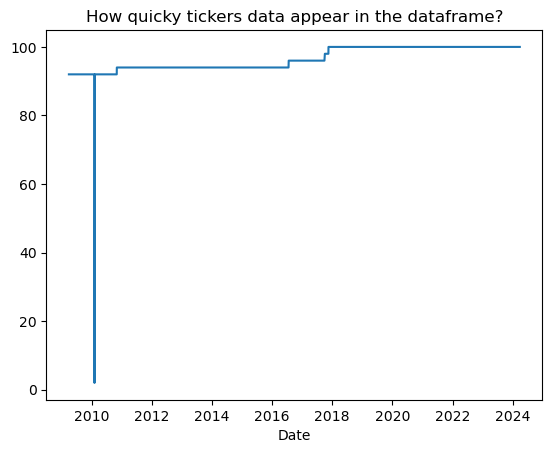

In [10]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()

# what does it mean ?

In [11]:
repo.indexes_df.shape

(3677, 50)

In [12]:
repo.indexes_df.tail(1)

,growth_nifty_1d,growth_nifty_3d,growth_nifty_7d,growth_nifty_30d,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,...,growth_brent_oil_90d_x,growth_brent_oil_180d_x,growth_brent_oil_365d_x,growth_brent_oil_1d_y,growth_brent_oil_3d_y,growth_brent_oil_7d_y,growth_brent_oil_30d_y,growth_brent_oil_90d_y,growth_brent_oil_180d_y,growth_brent_oil_365d_y
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,1.009187,1.010416,1.012296,1.026843,1.134759,1.15096,1.292492,1.001116,1.00693,1.014645,...,1.085225,1.075221,0.954709,1.016146,1.008415,1.001144,1.072059,1.085225,1.075221,0.954709


# 2) Transform all input fields (data_repo dfs) to one dataframe

In [13]:
from scripts.transform import TransformData

transformed =  TransformData(repo = repo)

In [14]:
if TRANSFORM_DATA:
  print(f'Running the tranformation')
  transformed.transform()
  print(f'Persisting the data')
  transformed.persist(data_dir='local_data/')
else:
  transformed.load(data_dir='local_data/')

In [15]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357062 entries, 0 to 357061
Data columns (total 75 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Open                          357062 non-null  float64            
 1   High                          357062 non-null  float64            
 2   Low                           357062 non-null  float64            
 3   Close                         357062 non-null  float64            
 4   Adj Close                     357062 non-null  float64            
 5   Volume                        357062 non-null  float64            
 6   Ticker                        357062 non-null  object             
 7   Year                          357062 non-null  int32              
 8   Month                         357062 non-null  int32              
 9   Weekday                       357062 non-null  int32              
 10  Date                

In [16]:
transformed.transformed_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_90d_x,growth_brent_oil_180d_x,growth_brent_oil_365d_x,growth_brent_oil_1d_y,growth_brent_oil_3d_y,growth_brent_oil_7d_y,growth_brent_oil_30d_y,growth_brent_oil_90d_y,growth_brent_oil_180d_y,growth_brent_oil_365d_y
357060,6355.000000,6399.399902,6220.0,6231.450195,6231.450195,603420.0,APOLLOHOSP.NS,2024,3,2,...,1.111987,1.074647,0.910331,0.998145,1.007726,0.990793,1.040111,1.111987,1.074647,0.910331
357061,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070.0,APOLLOHOSP.NS,2024,3,3,...,1.085225,1.075221,0.954709,1.016146,1.008415,1.001144,1.072059,1.085225,1.075221,0.954709


In [17]:
# last 3 days of the data
transformed.transformed_df.tail(3)['Date']

357059   2024-03-26 00:00:00+00:00
357060   2024-03-27 00:00:00+00:00
357061   2024-03-28 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

# 3) Train the best model 
* Model : Decision Tree ( max_depth=10 )

In [18]:
from scripts.train import TrainModel
import warnings

In [19]:
# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

In [20]:
if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_model() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')

Prepare the dataframe: define feature sets, add dummies, temporal split
The training period is from 2009-04-01 00:00:00+00:00 to 2022-03-28 00:00:00+00:00 

The validtion period is from 2022-03-28 00:00:00+00:00 to 2023-03-28 00:00:00+00:00 

The test period is from 2023-03-28 00:00:00+00:00 to 2024-03-28 00:00:00+00:00 

length: X_train (307562, 132),  X_validation (25000, 132), X_test (24500, 132)
  X_train_valid = (332562, 132),  all combined: X_all (357062, 132)


In [21]:
# resulting df
trained.df_full.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,Ticker_SUNPHARMA.NS,Ticker_TATACONSUM.NS,Ticker_TATAMTRDVR.NS,Ticker_TATASTEEL.NS,Ticker_TCS.NS,Ticker_TECHM.NS,Ticker_TITAN.NS,Ticker_ULTRACEMCO.NS,Ticker_WIPRO.NS,split
357060,6355.000000,6399.399902,6220.0,6231.450195,6231.450195,603420.0,APOLLOHOSP.NS,2024,3,2,...,0,0,0,0,0,0,0,0,0,test
357061,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070.0,APOLLOHOSP.NS,2024,3,3,...,0,0,0,0,0,0,0,0,0,test


In [22]:
trained.model

DecisionTreeClassifier(max_depth=10, random_state=42)

# 4) Inference

In [23]:
prediction_name='pred_dt_best' # random name for readability
trained.make_inference(pred_name=prediction_name)

Making inference


In [24]:
trained.df_full

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,Ticker_TATAMTRDVR.NS,Ticker_TATASTEEL.NS,Ticker_TCS.NS,Ticker_TECHM.NS,Ticker_TITAN.NS,Ticker_ULTRACEMCO.NS,Ticker_WIPRO.NS,split,pred_dt_best,pred_dt_best_rank
0,33.245834,33.245834,32.349998,32.670834,15.229213,5691696.0,IOC.NS,2009,4,2,...,0,0,0,0,0,0,0,train,0.846715,5.0
1,32.883331,33.916664,32.754166,33.762501,15.738088,6471276.0,IOC.NS,2009,4,3,...,0,0,0,0,0,0,0,train,0.896552,35.0
2,33.737499,34.166664,33.174999,33.862499,15.784698,3437256.0,IOC.NS,2009,4,0,...,0,0,0,0,0,0,0,train,0.846715,3.0
3,33.666664,35.416664,33.633331,35.054165,16.340185,4210608.0,IOC.NS,2009,4,2,...,0,0,0,0,0,0,0,train,0.896552,17.0
4,35.416664,36.041664,35.004166,35.641666,16.614040,1954644.0,IOC.NS,2009,4,3,...,0,0,0,0,0,0,0,train,0.896552,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357057,6189.899902,6214.399902,6105.600098,6182.500000,6182.500000,350032.0,APOLLOHOSP.NS,2024,3,3,...,0,0,0,0,0,0,0,test,0.521649,100.0
357058,6169.149902,6390.899902,6168.700195,6375.899902,6375.899902,727548.0,APOLLOHOSP.NS,2024,3,4,...,0,0,0,0,0,0,0,test,0.554466,100.0
357059,6398.000000,6463.450195,6309.500000,6322.450195,6322.450195,629120.0,APOLLOHOSP.NS,2024,3,1,...,0,0,0,0,0,0,0,test,0.554466,100.0
357060,6355.000000,6399.399902,6220.000000,6231.450195,6231.450195,603420.0,APOLLOHOSP.NS,2024,3,2,...,0,0,0,0,0,0,0,test,0.445946,100.0


In [25]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_dt_best,pred_dt_best_rank
3689,163.514130,IOC.NS,2024-03-14 00:00:00+00:00,0.554466,1.0
3690,154.539322,IOC.NS,2024-03-15 00:00:00+00:00,0.554466,1.0
3691,154.347351,IOC.NS,2024-03-18 00:00:00+00:00,0.845940,1.0
3692,149.020065,IOC.NS,2024-03-19 00:00:00+00:00,0.438517,1.0
3693,151.899673,IOC.NS,2024-03-20 00:00:00+00:00,0.521649,1.0
3694,157.898880,IOC.NS,2024-03-21 00:00:00+00:00,0.521649,1.0
3695,158.522781,IOC.NS,2024-03-22 00:00:00+00:00,0.554466,1.0
3696,160.730499,IOC.NS,2024-03-26 00:00:00+00:00,0.554466,1.0
11095,420.540955,ITC.NS,2024-03-27 00:00:00+00:00,0.627760,1.0
80982,2242.502197,HINDUNILVR.NS,2024-03-28 00:00:00+00:00,0.973333,1.0


In [26]:
print(trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS])

         Adj Close         Ticker                      Date  pred_dt_best  \
3689    163.514130         IOC.NS 2024-03-14 00:00:00+00:00      0.554466   
3690    154.539322         IOC.NS 2024-03-15 00:00:00+00:00      0.554466   
3691    154.347351         IOC.NS 2024-03-18 00:00:00+00:00      0.845940   
3692    149.020065         IOC.NS 2024-03-19 00:00:00+00:00      0.438517   
3693    151.899673         IOC.NS 2024-03-20 00:00:00+00:00      0.521649   
3694    157.898880         IOC.NS 2024-03-21 00:00:00+00:00      0.521649   
3695    158.522781         IOC.NS 2024-03-22 00:00:00+00:00      0.554466   
3696    160.730499         IOC.NS 2024-03-26 00:00:00+00:00      0.554466   
11095   420.540955         ITC.NS 2024-03-27 00:00:00+00:00      0.627760   
80982  2242.502197  HINDUNILVR.NS 2024-03-28 00:00:00+00:00      0.973333   

       pred_dt_best_rank  
3689                 1.0  
3690                 1.0  
3691                 1.0  
3692                 1.0  
3693             